In [53]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [54]:
#Límites
pd.options.display.max_columns = 77
pd.options.display.max_rows = 77

In [55]:
#Cargar DF
df = pd.read_csv('Berlin_76_Final.csv')
df.head()

,Unnamed: 0,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,prenzlauer berg,https://a0.muscache.com/pictures/airflow/Hosti...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,prenzlauer berg,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.53471,13.41810,Entire rental unit,Entire home/apt,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...",t,2025-06-21,2009-06-20,2025-03-02,No License,f,100.0,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,63.0,730.0,730.0,63.0,730.0,0,4,4,250,149.0,1.0,0.0,79,0.0,126,13230.0,4.63,4.67,4.52,4.65,4.70,4.92,4.61,1.0,1.0,0.0,0.0,0.76
1,1,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,prenzlauer berg,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",Born in Munich - lives in and loves Berlin. Wo...,within a day,f,https://a0.muscache.com/im/users/33852/profile...,https://a0.muscache.com/im/users/33852/profile...,prenzlauer berg,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.53269,13.41805,Entire rental unit,Entire home/apt,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...",t,2025-06-21,2015-08-09,2020-01-04,03/Z/RA/003410-18,f,50.0,87.618712,1.0,1.0,7.0,2.5,1.0,4.0,135.000000,6.0,14.0,6.0,6.0,14.0,14.0,6.0,14.0,0,0,5,193,7.0,0.0,0.0,29,0.0,0,0.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0,0.0,0.0,0.06
2,2,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,prenzlauer berg,https://a0.muscache.com/pictures/508703/24988a...,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany","From Berlin, Germany. We love to travel!",within a day,t,https://a0.muscache.com/im/users/55531/profile...,https://a0.muscache.com/im/users/55531/profile...,prenzlauer berg,"['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.54813,13.40366,Entire rental unit,Entire home/apt,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...",t,2025-06-21,2010-06-29,2023-11-30,No License,f,100.0,25.000000,4.0,5.0,1.0,1.0,0.0,1.0,75.000

In [56]:
Berlin = df.drop(['Unnamed: 0'], axis=1)
Berlin

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/3176,2025-06-21,city scrape,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,prenzlauer berg,https://a0.muscache.com/pictures/airflow/Hosti...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, Australia",We love to travel ourselves a lot and prefer t...,within a few hours,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,prenzlauer berg,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,1 bath,"[""Iron"", ""Cleaning products"", ""Wifi"", ""Oven"", ...",t,2025-06-21,2009-06-20,2025-03-02,No License,f,100.000000,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,63.0,730.0,730.0,63.0,730.0,0,4,4,250,149.0,1.0,0.0,79,0.0,126,13230.0,4.63,4.67,4.52,4.65,4.70,4.92,4.61,1.0,1.0,0.0,0.0,0.76
1,https://www.airbnb.com/rooms/9991,2025-06-21,city scrape,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,prenzlauer berg,https://a0.muscache.com/pictures/42799131/59c8...,33852,https://www.airbnb.com/users/show/33852,Philipp,2009-08-25,"Berlin, Germany",Born in Munich - lives in and loves Berlin. Wo...,within a day,f,https://a0.muscache.com/im/users/33852/profile...,https://a0.muscache.com/im/users/33852/profile...,prenzlauer berg,"['email', 'phone']",t,t,"Berlin, Germany",prenzlauer berg südwest,Pankow,52.532690,13.418050,Entire rental unit,Entire home/apt,2.5 baths,"[""Iron"", ""Wifi"", ""Babysitter recommendations"",...",t,2025-06-21,2015-08-09,2020-01-04,03/Z/RA/003410-18,f,50.000000,87.618712,1.0,1.0,7.0,2.5,1.0,4.0,135.000000,6.0,14.0,6.0,6.0,14.0,14.0,6.0,14.0,0,0,5,193,7.0,0.0,0.0,29,0.0,0,0.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0,0.0,0.0,0.06
2,https://www.airbnb.com/rooms/14325,2025-06-21,city scrape,Studio Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,prenzlauer berg,https://a0.muscache.com/pictures/508703/24988a...,55531,https://www.airbnb.com/users/show/55531,Chris + Oliver,2009-11-18,"Berlin, Germany","From Berlin, Germany. We love to travel!",within a day,t,https://a0.muscache.com/im/users/55531/profile...,https://a0.muscache.com/im/users/55531/profile...,prenzlauer berg,"['email', 'phone', 'work_email']",t,t,prenzlauer berg nordwest,prenzlauer berg nordwest,Pankow,52.548130,13.403660,Entire rental unit,Entire home/apt,1 bath,"[""Hangers"", ""Wifi"", ""Coffee maker"", ""Host gree...",t,2025-06-21,2010-06-29,2023-11-30,No License,f,100.000000,25.000000,4.0,5.0,1.0,1.0,0.0,1.0,75

In [57]:
# Formato de variables
Berlin['host_id'] = Berlin['host_id'].astype(str)
Berlin['latitude'] = Berlin['latitude'].astype(str)
Berlin['longitude'] = Berlin['longitude'].astype(str)
Berlin['host_is_superhost_num'] = Berlin['host_is_superhost'].map({'t':1,'f':0})

**Correlaciones**

In [58]:
# Variables cuantitativas
Berlin_cuant = Berlin.select_dtypes(['int64', 'float64'])
Berlin_cuant.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_num
0,100.0,80.000000,1.0,1.0,2.0,1.0,1.0,2.0,105.000000,63.0,730.0,63.0,63.0,730.0,730.0,63.0,730.0,0,4,4,250,149.0,1.0,0.0,79,0.0,126,13230.0,4.63,4.67,4.52,4.65,4.70,4.92,4.61,1.0,1.0,0.0,0.0,0.76,0
1,50.0,87.618712,1.0,1.0,7.0,2.5,1.0,4.0,135.000000,6.0,14.0,6.0,6.0,14.0,14.0,6.0,14.0,0,0,5,193,7.0,0.0,0.0,29,0.0,0,0.0,5.00,5.00,5.00,5.00,5.00,4.86,4.86,1.0,1.0,0.0,0.0,0.06,0
2,100.0,25.000000,4.0,5.0,1.0,1.0,0.0,1.0,75.000000,150.0,1125.0,150.0,150.0,1125.0,1125.0,150.0,1125.0,0,0,0,262,26.0,0.0,0.0,91,0.0,0,0.0,4.68,5.00,4.85,4.70,4.85,4.60,4.45,4.0,4.0,0.0,0.0,0.14,1
3,100.0,87.618712,4.0,4.0,4.0,1.0,1.0,2.0,173.672536,93.0,365.0,93.0,93.0,365.0,365.0,93.0,365.0,0,0,0,0,48.0,0.0,0.0,0,0.0,0,0.0,4.72,4.86,4.86,4.93,4.86,4.67,4.71,2.0,2.0,0.0,0.0,0.26,0
4,100.0,94.000000,2.0,5.0,2.0,1.0,0.0,1.0,28.000000,92.0,365.0,92.0,92.0,365.0,365.0,92.0,365.0,0,0,17,111,298.0,0.0,0.0,29,0.0,0,0.0,4.77,4.82,4.71,4.89,4.92,4.88,4.65,1.0,1.0,0.0,0.0,1.60,0


In [59]:
Berlin_corr = Berlin_cuant.corr()
Berlin_corr

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_num
host_response_rate,1.000000,0.339578,-0.084186,-0.080148,0.112577,0.014980,0.026643,0.122026,0.023193,-0.271874,-0.149060,-0.272246,-0.234988,-0.070802,-0.034255,-0.271758,-0.048368,0.060163,0.091804,0.110838,0.137775,0.212647,0.278294,0.262167,0.142788,0.250125,0.315556,0.273274,0.142961,0.142637,0.151628,0.145929,0.145625,0.143113,0.142979,0.087016,0.105067,0.071319,0.000326,0.287392,0.297236
host_acceptance_rate,0.339578,1.000000,-0.054875,-0.064361,0.087715,-0.020094,-0.007619,0.075098,0.095858,-0.010704,0.101183,-0.011635,-0.029771,0.183056,0.217152,-0.010998,0.201304,0.006273,0.013906,0.016840,0.022688,0.170200,0.206673,0.160895,0.031120,0.185410,0.178461,0.186516,0.032657,0.037654,0.042346,0.040171,0.036138,0.038989,0.034430,-0.137396,0.031989,0.077098,-0.022923,0.208719,0.147663
host_listings_count,-0.084186,-0.054875,1.000000,0.996923,0.000632,-0.026034,-0.008208,-0.023027,0.003843,0.134396,0.109663,0.141520,-0.027988,0.062675,0.053485,0.149187,0.055485,0.038026,0.030559,0.029001,0.104598,-0.099205,-0.096612,-0.094087,0.061546,-0.090912,-0.111379,-0.076091,-0.305447,-0.304101,-0.300663,-0.305370,-0.307242,-0.301347,-0.310397,0.444451,0.210400,-0.030248,-0.009285,-0.114915,-0.101279
host_total_listings_count,-0.080148,-0.064361,0.996923,1.000000,0.004504,-0.024556,-0.006016,-0.017418,0.001976,0.128088,0.101570,0.135026,-0.029830,0.054981,0.046309,0.142577,0.048009,0.048491,0.041566,0.040567,0.114275,-0.098889,-0.095731,-0.093018,0.073526,-0.090546,-0.109934,-0.074484,-0.304083,-0.302761,-0.299378,-0.303898,-0.305681,-0.299485,-0.309099,0.461284,0.223158,-0.030856,-0.001150,-0.113348,-0.103374
accommodates,0.112577,0.087715,0.000632,0.004504,1.000000,0.264063,0.559806,0.704707,0.288068,-0.189371,-0.041780,-0.191448,-0.186684,-0.017855,0.002982,-0.191333,-0.001937,0.033779,0.049411,0.070357,0.123448,0.128345,0.170865,0.128767,0.115367,0.153233,0.151767,0.302208,0.067414,0.067336,0.069014,0.069961,0.068645,0.068485,0.065303,0.053226,0.102046,-0.089870,-0.022803,0.169680,0.059736
bathrooms,0.014980,-0.020094,-0.026034,-0.024556,0.264063,1.000000,0.326673,0.235728,0.197652,-0.044623,-0.027922,-0.043648,-0.044365,-0.039424,-0.036274,-0.045507,-0.034944,-0.001601,0.004321,0.005822,0.031717,0.012353,0.017430,0.003537,0.022160,0.022662,-0.006858,0.105546,0.014193,0.011792,0.011887,0.010289,0.012955,0.009636,0.011973,-0.024670,-0.004662,-0.038382,-0.016748,0.000644,0.034386
bedrooms,0.026643,-0.007619,-0.008208,-0.006016,0.559806,0.326673,1.000000,0.495652,0.252244,-0.045644,0.002009,-0.045787,-0.042166,-0.009404,0.002950,-0.044771,0.000743,-0.039817,-0.036108,-0.027514,0.002738,0.012533,0.020460,0.015731,-0.006565,0.015701,-0.002412,0.174629,0.008197,0.006035,0.007278,0.006564,0.008569,0.006350,0.008248,-0.013123,0.007509,-0.101820,-0.018454,0.026144,-0.007192
beds,0.122026,0.075098,-0.023027,-0.017418,0.704707,0.235728,0.495652,1.000000,0.239296,-0.182526,-0.052233,-0.185459,-0.172873,-0.026534,-0.015508,-0.185227,-0.017640,0.057887,0.074343,0.096671,0.151365,0.151268,0.175307,0.136936,0.142508,0.161475,0.168496,0.296944,0.080732,0.080226,0.083790,0.084989,0.0836

**Correlación No Lineal**

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = a*x**2 + b*x + c   ("Función cuadrática")

            y = a*np.exp(-b*x) + c   ("Función exponencial")

            y = 1/(a*x)           ("Función inversa")

            y = a*np.sin(x) + b ("Función senoidal")

            y = a*np.tan(x) + b ("Función tangencial")

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

            y = (a*x**2 + b)/ c*x**2 (Función cociente entre polinomios)

            y = a*np.log(x) + b  (Función logaritmica)

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

            y = 1/(a*x**2)  (Función cuadrática inversa)

            y = a/(b*x**2) + c*x (Función polinomial inversa)





**Modelos**

In [74]:
# Modelo 1
# y = Host_response_rate 
# x = reviews_per_month (0.28)
x1 = Berlin_cuant['reviews_per_month']
y1= Berlin_cuant['host_response_rate']

# Función
def func_cuad (x, a, b, c):
    return a*x**2 + b*x + c 

# Parámetros
Par1, covs1= curve_fit(func_cuad, x1,y1 )
print(Par1)

# Predicciones
y_pred1 = func_cuad(x1, *Par1)
print(y_pred1)

# Coeficiente de determinación R^2
r2_m1 = r2_score(y1, y_pred1)
print(r2_m1)

# Coeficiente de correlación
r_m1 = np.sqrt(abs(r2_m1))
print(r_m1)


[-0.68544523  5.01662982 90.54731712]
0        93.964043
1        90.845847
2        91.236211
3        91.805305
4        96.819185
           ...    
14182    90.547317
14183    90.547317
14184    90.547317
14185    90.547317
14186    90.547317
Name: reviews_per_month, Length: 14187, dtype: float64
0.10255902053163224
0.32024837319123456


/var/folders/c5/_p39j2b97hb2d064t5tdpypm0000gn/T/ipykernel_19568/3856553503.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
/var/folders/c5/_p39j2b97hb2d064t5tdpypm0000gn/T/ipykernel_19568/3856553503.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "red")


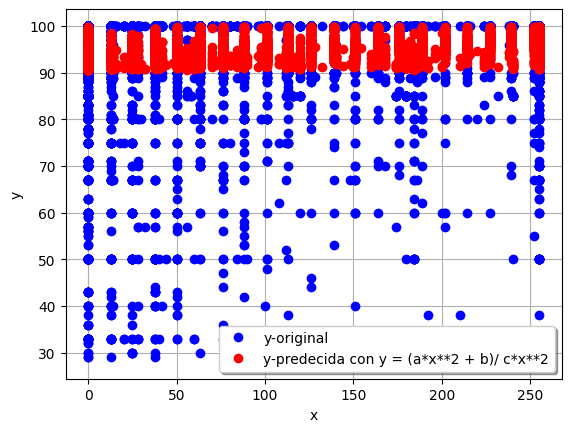

In [70]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred1, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [81]:
# Modelo 2
# y = Host_response_rate 
# x = reviews_per_month (0.28)
x2 = Berlin_cuant['reviews_per_month']
y2 = Berlin_cuant['host_response_rate']

# Función 
def func_log  (x, a, b):
    return a*np.log(x) + b

# Máscara, evitar 0 para Log y definir puntos iniciales
mask = (x2 > 0) & np.isfinite(x2) & np.isfinite(y2)
x2_f, y2_f = x2[mask], y2[mask]


# Parámetros
Par2, covs_Par2 = curve_fit(func_log, x2_f, y2_f)
print('Parámetros: ',Par2)

# Predicciones
y_pred2 = func_log(x2_f, *Par2)
print(y_pred2)

# Coeficiente de determinación R^2
r2_m2 = r2_score(y2_f, y_pred2)
print(r2_m2)

# Coeficiente de correlación
r_m2  = np.sqrt(abs(r2_m2))
print(r_m2)

Parámetros:  [ 1.91403877 95.65329381]
0        95.128011
1        90.268317
2        91.890078
3        93.074943
4        96.552899
           ...    
14085    98.306715
14097    95.653294
14105    96.980004
14115    95.653294
14116    97.756080
Name: reviews_per_month, Length: 10838, dtype: float64
0.10136272942703473
0.31837513946135104


In [ ]:
# Modelo de IAa
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import numpy as np

# y = Host_response_rate 
# x = reviews_per_month
x_h_r_r_m2= Berlin_cuant['reviews_per_month']
y_h_r_r_m2 = Berlin_cuant['host_response_rate']

# Función logística
def func_logistica(x, L, k, x0):
    return L / (1 + np.exp(-k*(x - x0)))

# Parámetros iniciales de prueba
p0 = [100, 0.01, np.median(x_h_r_r_m2)]   # L=100 (techo), k=0.01 (pendiente), x0=mediana de x

# Ajuste con curve_fit
P_log, covs_log = curve_fit(func_logistica, x_h_r_r_m2, y_h_r_r_m2, p0=p0, maxfev=10000)
print("Parámetros logísticos:", P_log)

# Predicciones
y_pred_log = func_logistica(x_h_r_r_m2, *P_log)

# Coeficiente de determinación R^2
R2_log = r2_score(y_h_r_r_m2, y_pred_log)
print("R^2:", R2_log)

# Coeficiente de correlación
coef_corr_log = np.sqrt(abs(R2_log))
print("Coef. correlación:", coef_corr_log)



Parámetros logísticos: [98.8938909   1.05354587 -2.21528175]
R^2: 0.1059700144115816
Coef. correlación: 0.3255303586634918


In [ ]:
# Modelo 3
#  y = host_acceptance_rate
x3 = Berlin_cuant['AQUI_TU_X']
y3 = Berlin_cuant['host_acceptance_rate']

# Función (ejemplo cuadrática, cámbiala según necesites)
def func_m3(x, a, b, c):
    return a*x**2 + b*x + c

Par3, covs3 = curve_fit(func_m3, x3, y3)
print(Par3)

y_pred3 = func_m3(x3, *Par3)
print(y_pred3)

r2_m3 = r2_score(y3, y_pred3)
print(r2_m3)

r_m3 = np.sqrt(abs(r2_m3))
print(r_m3)


In [ ]:
# Modelo 4
#  y = host_acceptance_rate
x4 = Berlin_cuant['AQUI_TU_X']
y4 = Berlin_cuant['host_acceptance_rate']

def func_m4(x, a, b, c):
    return a*x**2 + b*x + c

Par4, covs4 = curve_fit(func_m4, x4, y4)
print(Par4)

y_pred4 = func_m4(x4, *Par4)
print(y_pred4)

r2_m4 = r2_score(y4, y_pred4)
print(r2_m4)

r_m4 = np.sqrt(abs(r2_m4))
print(r_m4)

In [ ]:
# Modelo 5
# y = host_total_listings_count

x5 = Berlin_cuant['AQUI_TU_X']
y5 = Berlin_cuant['host_total_listings_count']

def func_m5(x, a, b, c):
    return a*x**2 + b*x + c

Par5, covs5 = curve_fit(func_m5, x5, y5)
print(Par5)

y_pred5 = func_m5(x5, *Par5)
print(y_pred5)

r2_m5 = r2_score(y5, y_pred5)
print(r2_m5)

r_m5 = np.sqrt(abs(r2_m5))
print(r_m5)


In [ ]:
# Modelo 6
# y = host_total_listings_count

x6 = Berlin_cuant['AQUI_TU_X']
y6 = Berlin_cuant['host_total_listings_count']

def func_m6(x, a, b, c):
    return a*x**2 + b*x + c

Par6, covs6 = curve_fit(func_m6, x6, y6)
print(Par6)

y_pred6 = func_m6(x6, *Par6)
print(y_pred6)

r2_m6 = r2_score(y6, y_pred6)
print(r2_m6)

r_m6 = np.sqrt(abs(r2_m6))
print(r_m6)

In [ ]:
# Modelo 7
# y = accommodates

x7 = Berlin_cuant['AQUI_TU_X']
y7 = Berlin_cuant['accommodates']

def func_m7(x, a, b, c):
    return a*x**2 + b*x + c

Par7, covs7 = curve_fit(func_m7, x7, y7)
print(Par7)

y_pred7 = func_m7(x7, *Par7)
print(y_pred7)

r2_m7 = r2_score(y7, y_pred7)
print(r2_m7)

r_m7 = np.sqrt(abs(r2_m7))
print(r_m7)


In [ ]:
# Modelo 8
# y = accommodates

x8 = Berlin_cuant['AQUI_TU_X']
y8 = Berlin_cuant['accommodates']

def func_m8(x, a, b, c):
    return a*x**2 + b*x + c

Par8, covs8 = curve_fit(func_m8, x8, y8)
print(Par8)

y_pred8 = func_m8(x8, *Par8)
print(y_pred8)

r2_m8 = r2_score(y8, y_pred8)
print(r2_m8)

r_m8 = np.sqrt(abs(r2_m8))
print(r_m8)

In [ ]:
# Modelo 9
# y = reviews_per_month

x9 = Berlin_cuant['AQUI_TU_X']
y9 = Berlin_cuant['reviews_per_month']

def func_m9(x, a, b, c):
    return a*x**2 + b*x + c

Par9, covs9 = curve_fit(func_m9, x9, y9)
print(Par9)

y_pred9 = func_m9(x9, *Par9)
print(y_pred9)

r2_m9 = r2_score(y9, y_pred9)
print(r2_m9)

r_m9 = np.sqrt(abs(r2_m9))
print(r_m9)

In [ ]:
# Modelo 10
# y = reviews_per_month

x10 = Berlin_cuant['AQUI_TU_X']
y10 = Berlin_cuant['reviews_per_month']

def func_m10(x, a, b, c):
    return a*x**2 + b*x + c

Par10, covs10 = curve_fit(func_m10, x10, y10)
print(Par10)

y_pred10 = func_m10(x10, *Par10)
print(y_pred10)

r2_m10 = r2_score(y10, y_pred10)
print(r2_m10)

r_m10 = np.sqrt(abs(r2_m10))
print(r_m10)

In [ ]:
# Modelo 11
# y = price

x11 = Berlin_cuant['AQUI_TU_X']
y11 = Berlin_cuant['price']

def func_m11(x, a, b, c):
    return a*x**2 + b*x + c

Par11, covs11 = curve_fit(func_m11, x11, y11)
print(Par11)

y_pred11 = func_m11(x11, *Par11)
print(y_pred11)

r2_m11 = r2_score(y11, y_pred11)
print(r2_m11)

r_m11 = np.sqrt(abs(r2_m11))
print(r_m11)

In [ ]:
# Modelo 12
# y = price

x12 = Berlin_cuant['AQUI_TU_X']
y12 = Berlin_cuant['price']

def func_m12(x, a, b, c):
    return a*x**2 + b*x + c

Par12, covs12 = curve_fit(func_m12, x12, y12)
print(Par12)

y_pred12 = func_m12(x12, *Par12)
print(y_pred12)

r2_m12 = r2_score(y12, y_pred12)
print(r2_m12)

r_m12 = np.sqrt(abs(r2_m12))
print(r_m12)